# Playing around with simple priors to plot a simulated total revenue prediction from parts

In [42]:
import pymc as pm
import arviz as az


In [43]:
with pm.Model() as model:
    # base revenue
    base = pm.Normal("base", mu=20, sigma=5)

    # binary outcomes
    big1 = pm.Bernoulli("big1", p=0.5) * 10

    rev = pm.Deterministic("rev", base + big1)
    
    prior_samples = pm.sample_prior_predictive(samples=10000)
    # trace = pm.sample(1000)

Sampling: [base, big1]


<Axes: title={'center': 'rev'}>

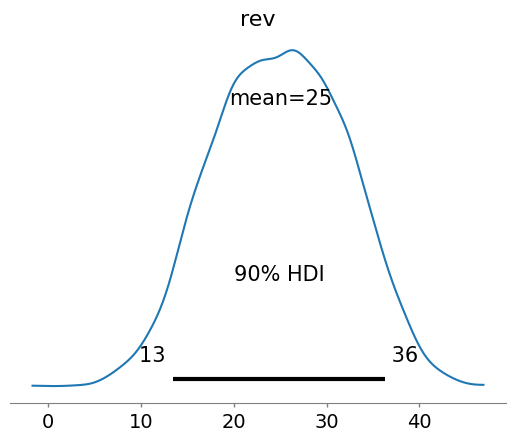

In [44]:
# Step 2: Extract the prior samples for the deterministic variable
rev_prior_samples = prior_samples.prior['rev']

# Step 3: Plot the prior distribution using ArviZ
az.plot_posterior({'rev': rev_prior_samples}, hdi_prob=0.9)